# Pancreas: Gene-Cell Attention Visualization & Clustering Comparison


## Normalized Attention Results - Layer 4

In [1]:
import pickle
from pathlib import Path
from scripts.gene_cell_attention_analysis import GeneCellAttentionAnalyzer
import pandas as pd
import numpy as np

# Initialize the analyzing targets
model_type = 'no_seq'
edge_type = 'tx-bd'
layer_index = 4
test_mode = True

# Marker genes for each cell type in Pancreas
marker_genes_dict = {
    "Tumor Cells": ["CFTR", "CFB", "CXCL6", "EPCAM"],
    "Fibroblasts": ["PDGFRA", "ACTA2", "VCAN", "CTHRC1", "C1R"],
    "Acinar Metaplastic Cells": ["ANPEP", "AMY2A"],
    "Macrophages": ["CD68", "CD14", "MS4A6A", "LAPTM5"],
    "Mast Cells": ["KIT"],
    "T Cells": ["CD3E", "CD3D", "IL7R", "CCL5", "TRAC"],
    "B Cells": ["BANK1", "MS4A1", "CD79A"],
    "Lymphatic Endothelial Cells": ["LYVE1"],
    "Smooth Muscle Cells": ["MYH11"],
    "Endocrine": ["INS", "GCG", "PPY", "SCGN", "PCSK2", "CHGA"],
    "Endothelial": ["PECAM1", "VWF", "EPAS1", "CD93", "CD34"]
}

Loaded attention data:
  - Attention matrices shape: 5 layers, 4 heads, 538 genes, 135010 cells
Filtering cells with mean attention between 1e-06 and 1...
Cell filtering completed:
  - Original cells: 135010
  - Filtered cells: 8854
  - Removed cells: 126156
  - Threshold: (1e-06, 1)
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP embedding completed:
  - Embedding shape: (8854, 2)
Performing leiden clustering...


/home/f833u/segger/attention_downstream/scripts/gene_cell_attention_analysis.py:338: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(self.adata, resolution=self.resolution, random_state=self.random_state)


Clustering completed with 10 clusters
Number of cells in each cluster: [2402 1758 1403  824  758  512  506  312  209  170]
Finding top 5 genes per cluster...
Top genes identified for 10 clusters
Using true cell types to get top genes per true cell type...
Top genes identified for 14 clusters
Creating top genes heatmap...
Creating top genes heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Fibroblasts, Acinar Metaplastic Cells, etc.


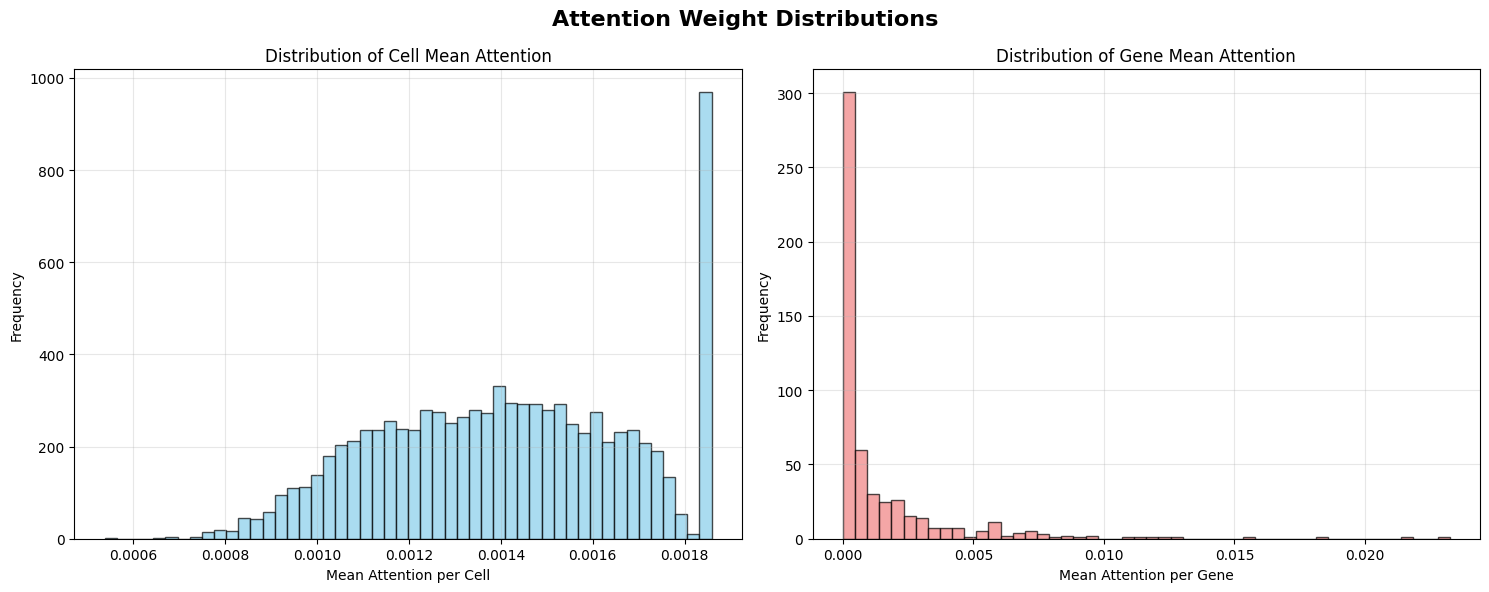

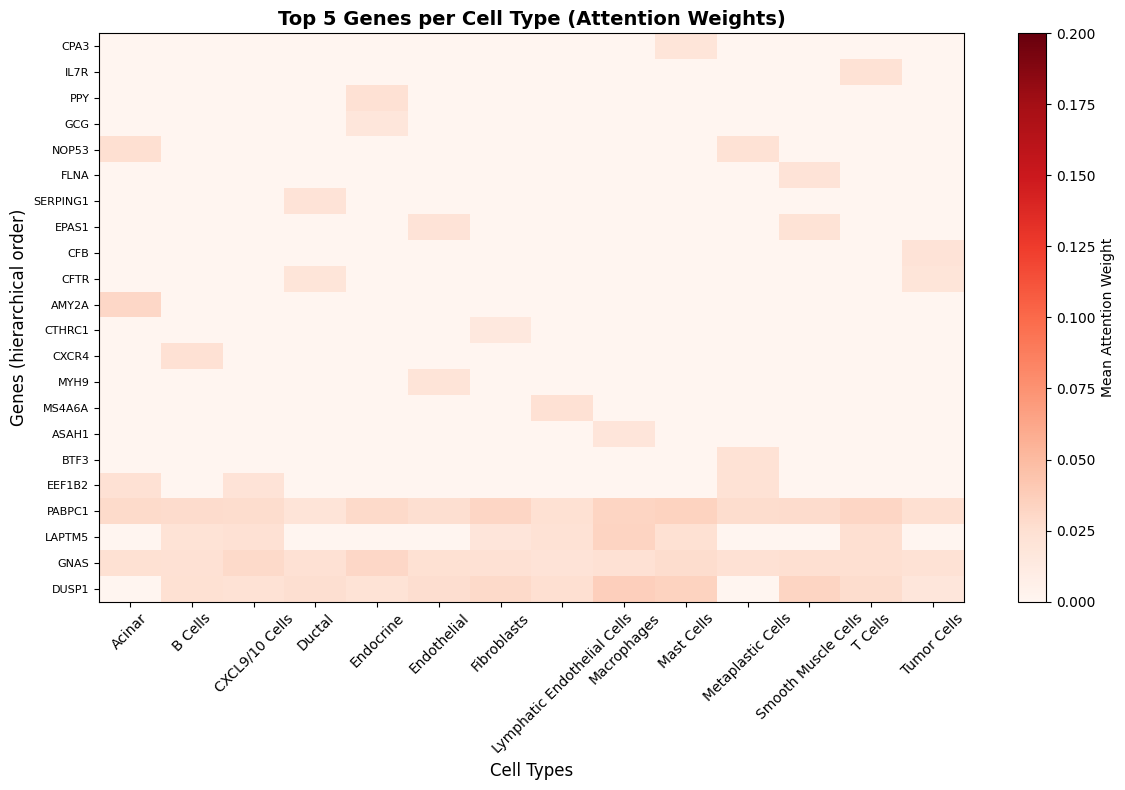

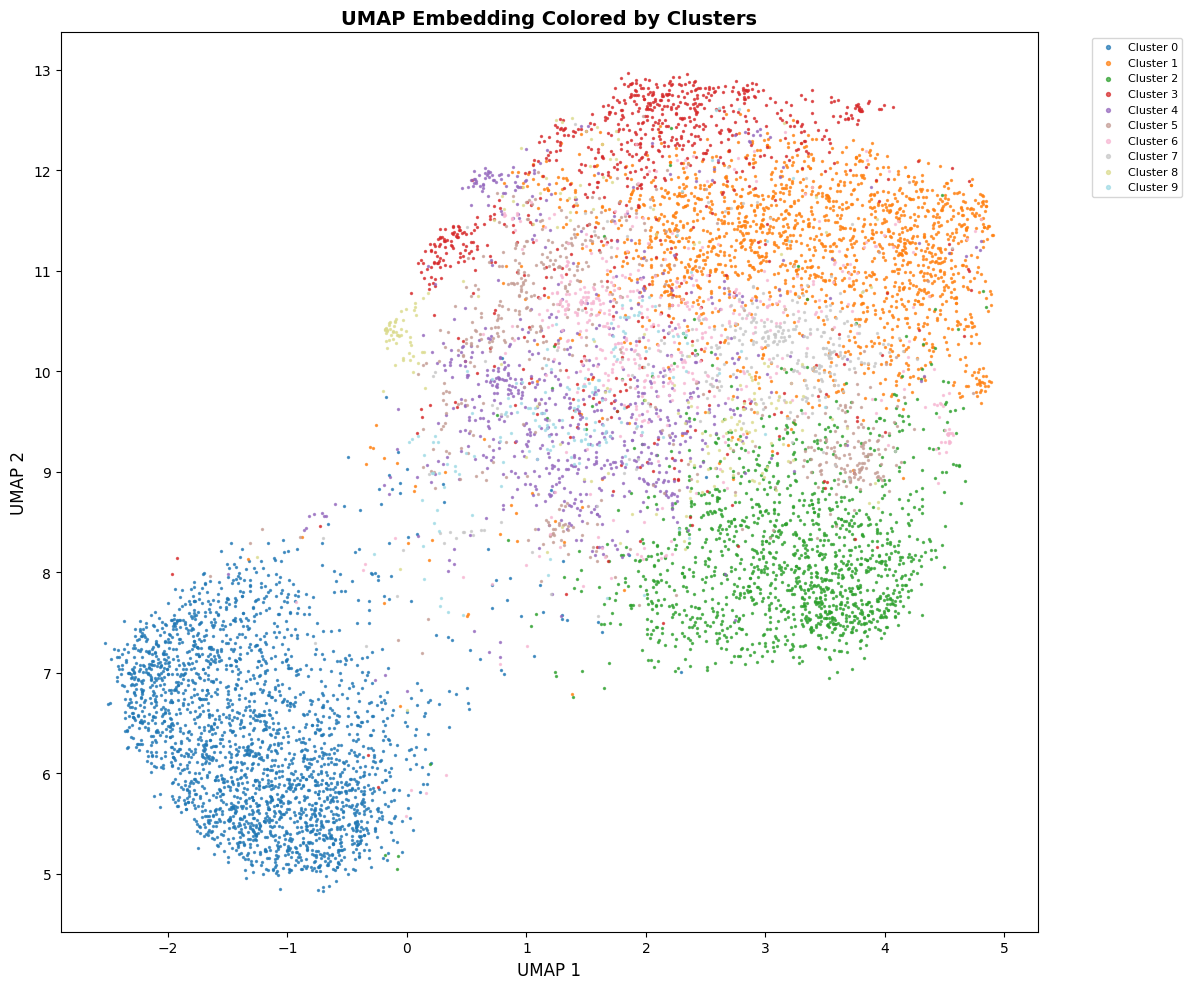

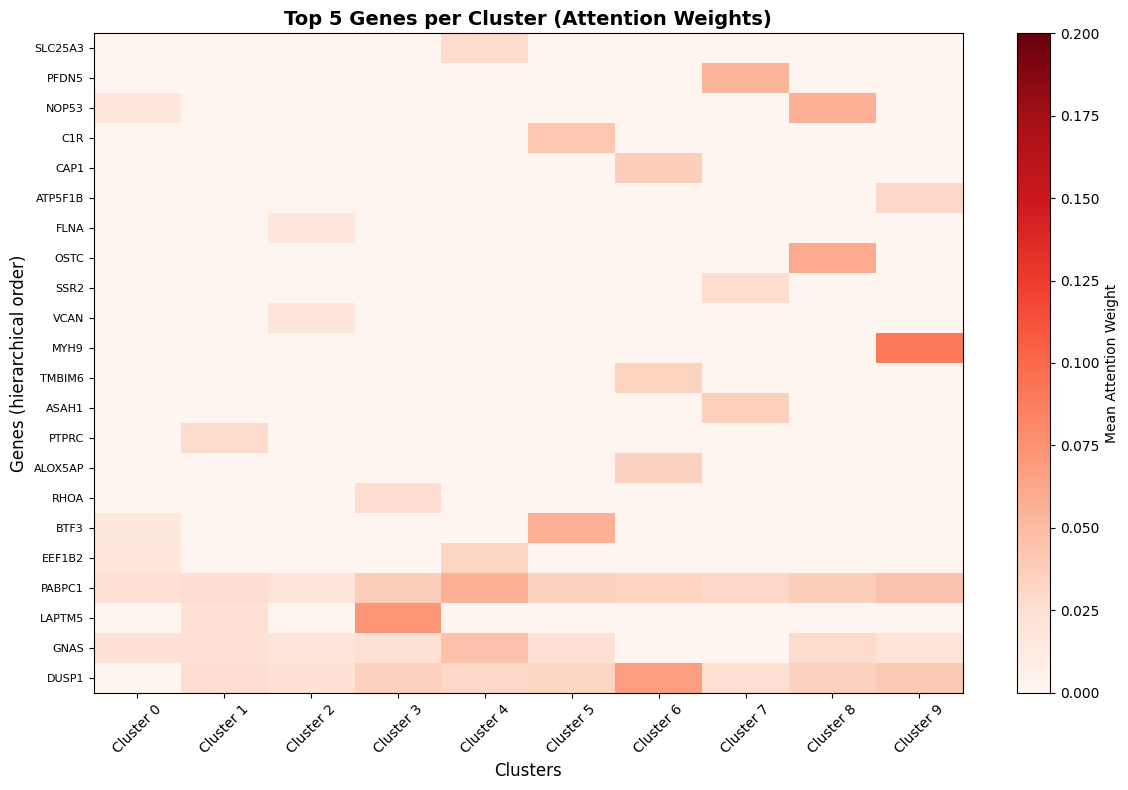

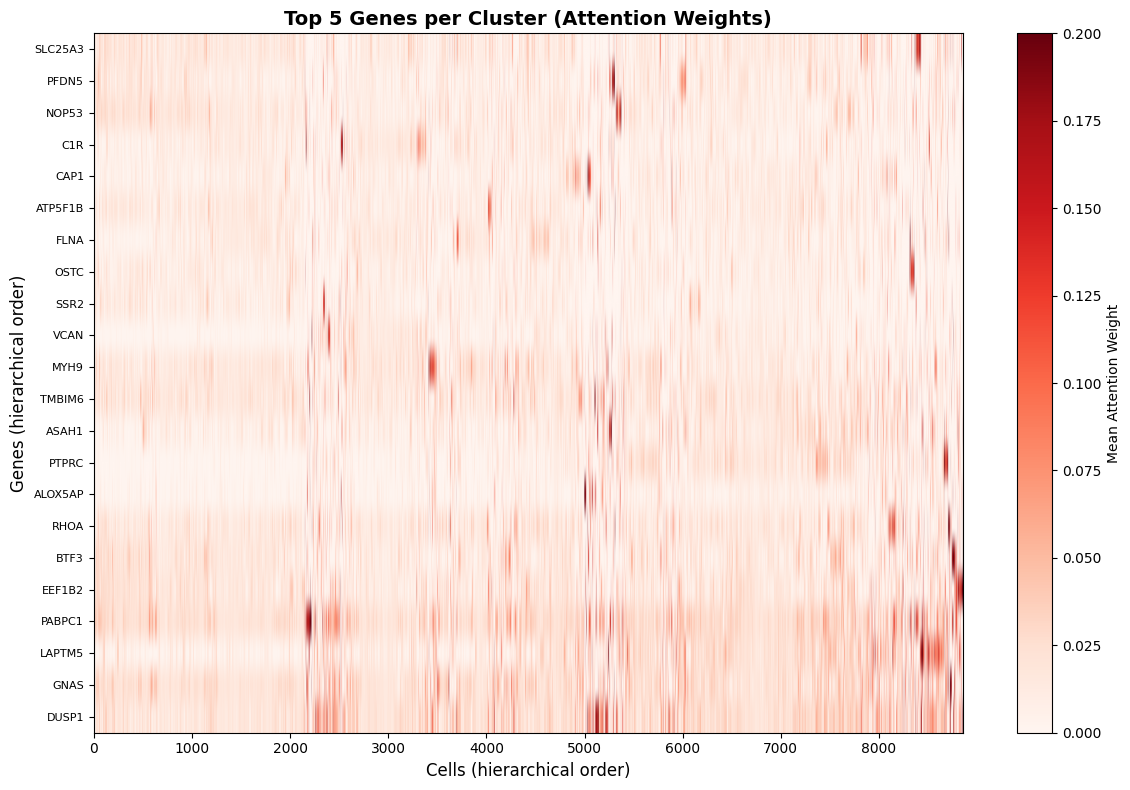

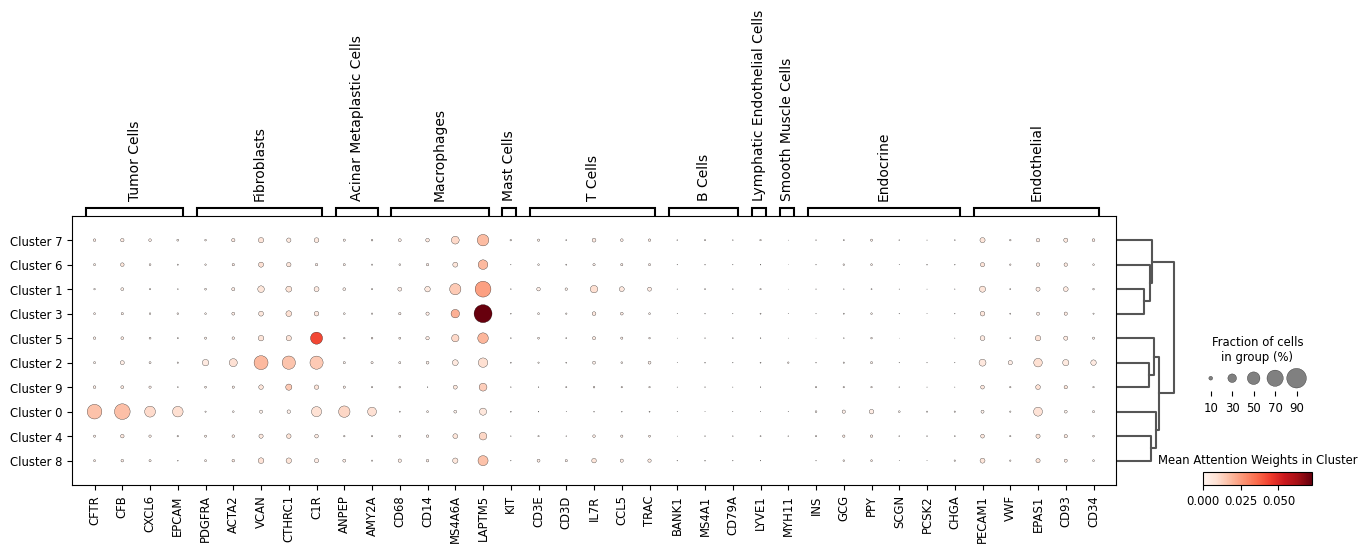

In [2]:
# Load the attention results
with open(Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/pancreas') / f'attention_gene_matrix_dict_{model_type}_{edge_type}_{test_mode}.pkl', 'rb') as f:
    attention_results = pickle.load(f)

attention_matrices = attention_results['adj_avg_matrix']
cell_ids = attention_results['cell_ids']
gene_names = attention_results['gene_names']
# cell_type_dict = attention_results['cell_type_dict']



XENIUM_DATA_DIR = Path('/dkfz/cluster/gpu/data/OE0606/fengyun/xenium_data/xenium_pancreas')
cell_types = pd.read_csv(XENIUM_DATA_DIR / 'cell_groups.csv')
cell_type_dict = dict(zip(cell_types['cell_id'], cell_types['group']))

for k, v in cell_type_dict.items():
    if v in ["Endocrine 1", "Endocrine 2"]:
        cell_type_dict[k] = "Endocrine"
    elif v in ["Tumor Cells", "CFTR- Tumor Cells"]:
        cell_type_dict[k] = "Tumor Cells"

# Initialize the analyzer
analyzer = GeneCellAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_cells=attention_matrices[0][0].shape[1], num_heads=4, num_layers=5)

# run the analysis
kwargs = {'attention_matrices': attention_matrices, 'cell_ids': cell_ids, 'cell_type_dict': cell_type_dict, 'gene_names': gene_names, 'layer_idx': layer_index, 'max_cells': None, 'min_attention_threshold': 1e-6, 'max_attention_threshold': 1, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'marker_genes_dict': marker_genes_dict, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_top_genes_cluster_heatmap': None, 'save_path_top_genes_cell_heatmap': None}

analyzer.run_complete_analysis(**kwargs)

## Unnormalized attention analysis

Loaded attention data:
  - Attention matrices shape: 5 layers, 4 heads, 538 genes, 135010 cells
Filtering cells with mean attention between 1e-06 and 1...
Cell filtering completed:
  - Original cells: 135010
  - Filtered cells: 8854
  - Removed cells: 126156
  - Threshold: (1e-06, 1)
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...
UMAP embedding completed:
  - Embedding shape: (8854, 2)
Performing leiden clustering...
Clustering completed with 16 clusters
Number of cells in each cluster: [1290 1080  359  353  168  132   98   91  920  897  828  776  596  486
  397  383]
Finding top 5 genes per cluster...
Top genes identified for 16 clusters
Using true cell types to get top genes per true cell type...
Top genes identified for 14 clusters
Creating top genes heatmap...
Creating top genes heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 10, etc.
var_group_labels: Tumor Cells, Fibroblasts, Acinar Metaplastic Cells, etc.


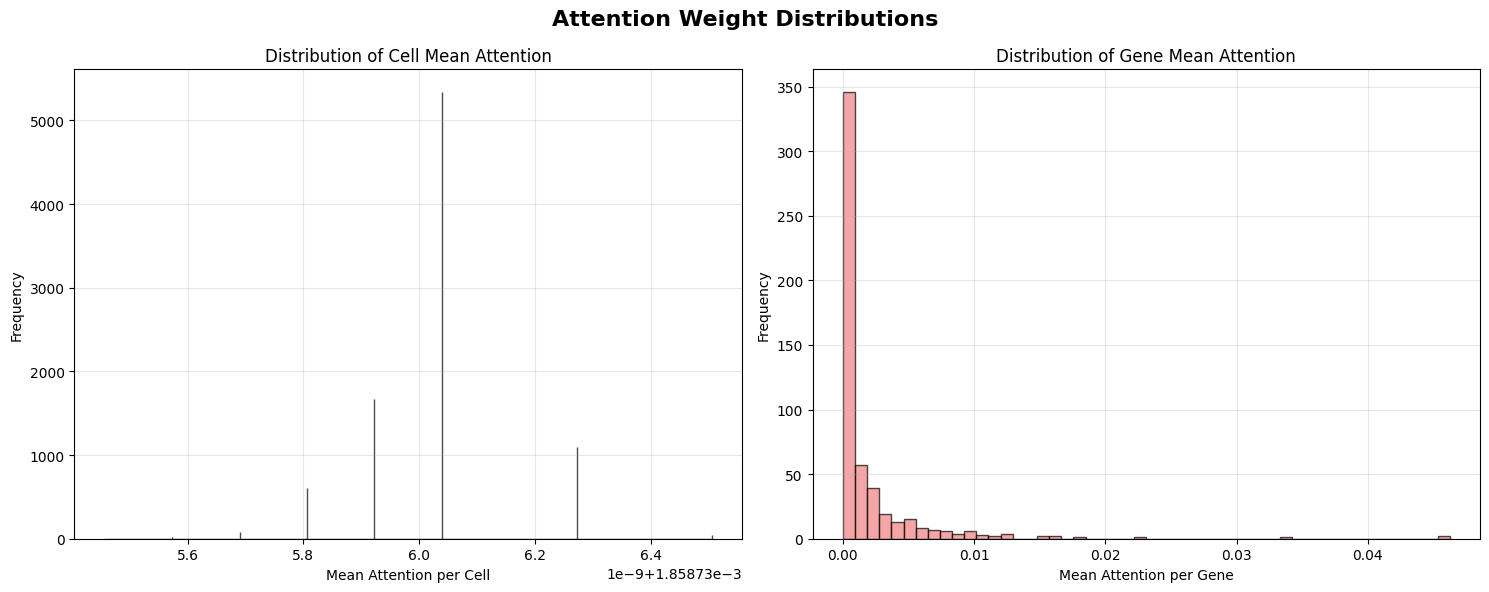

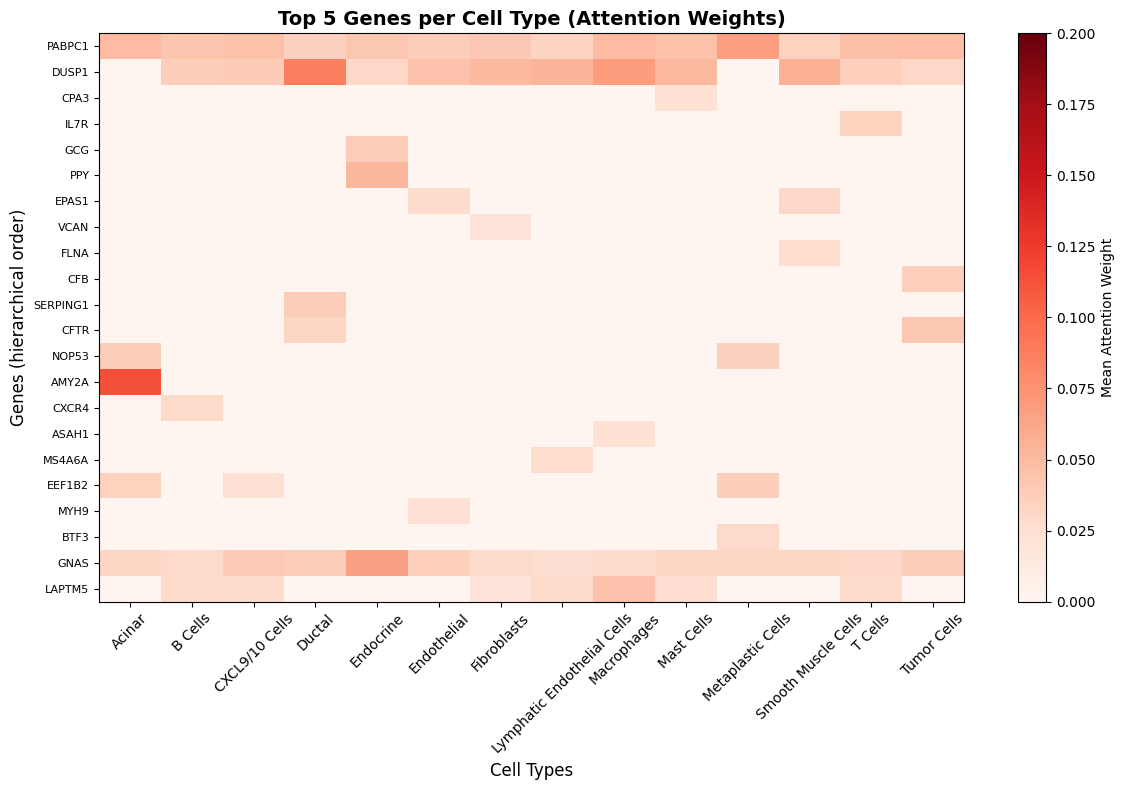

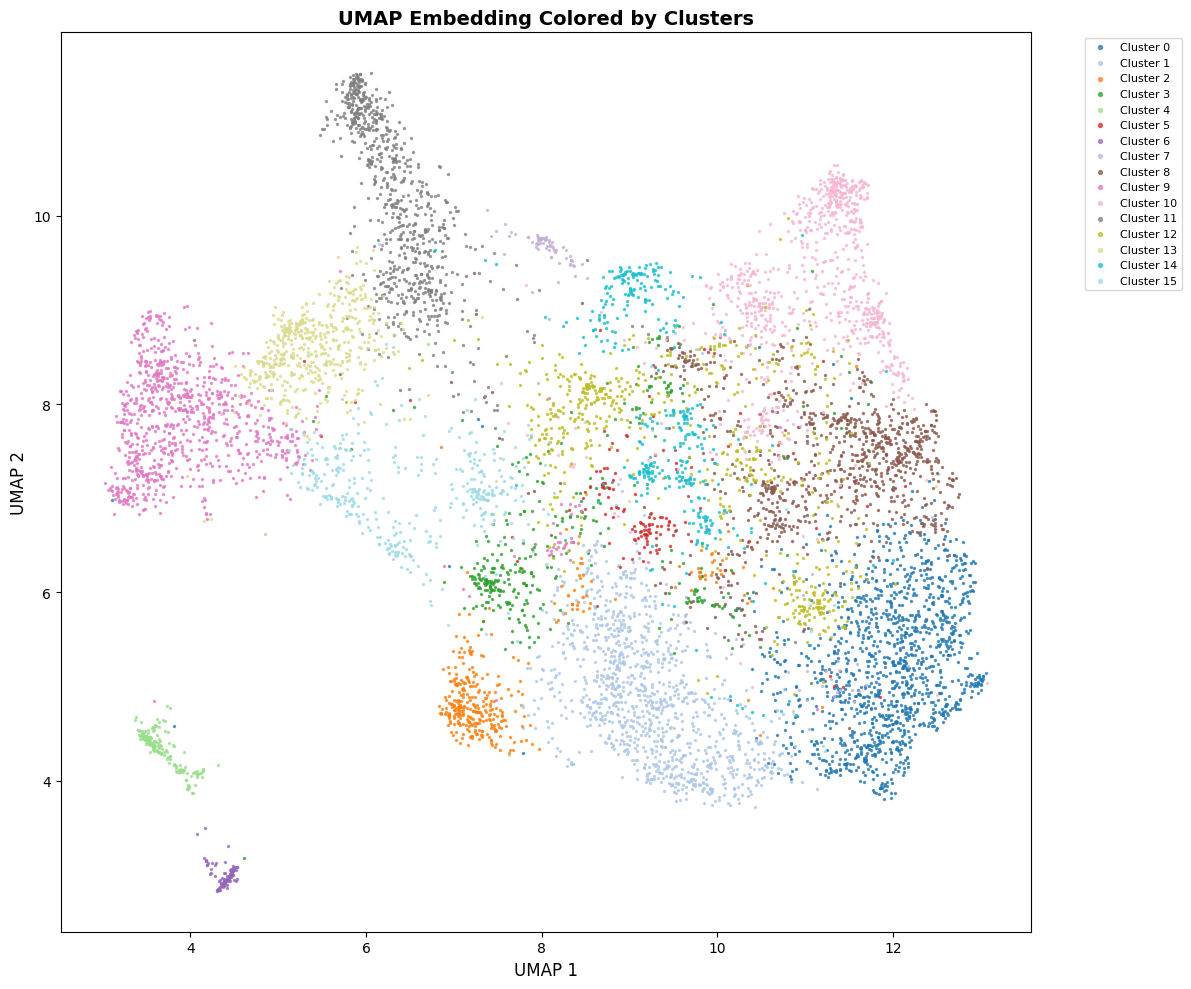

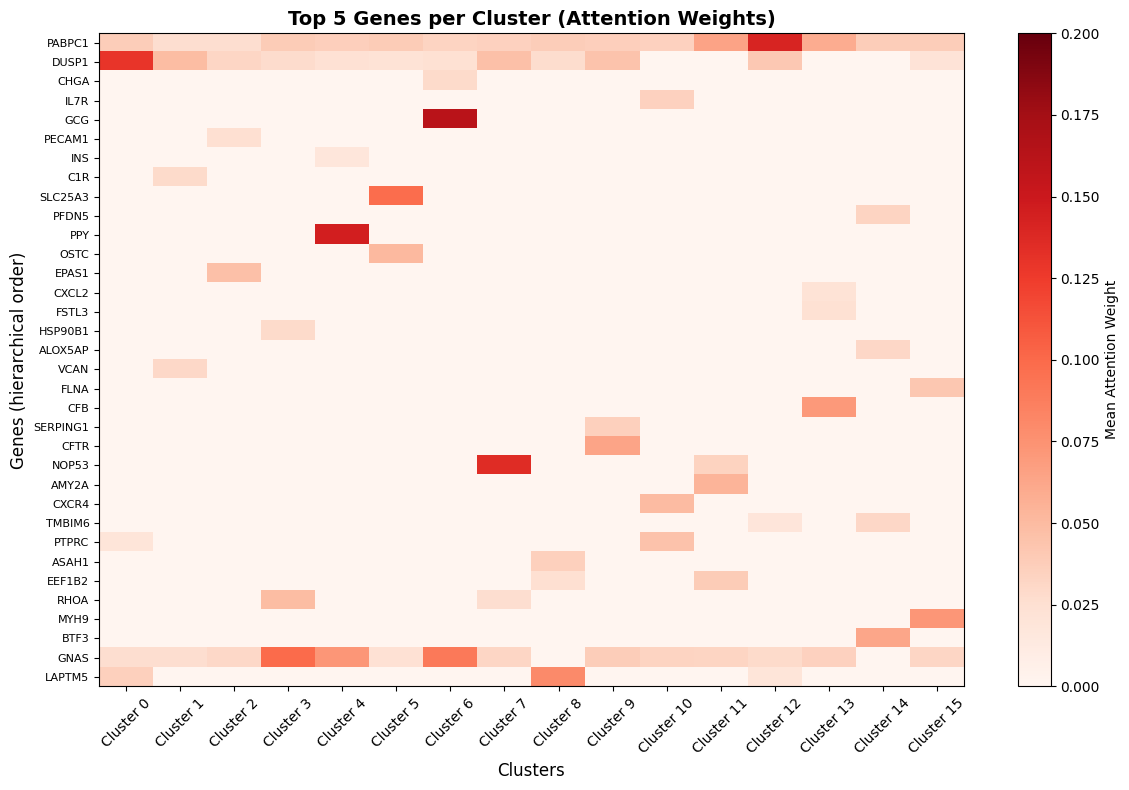

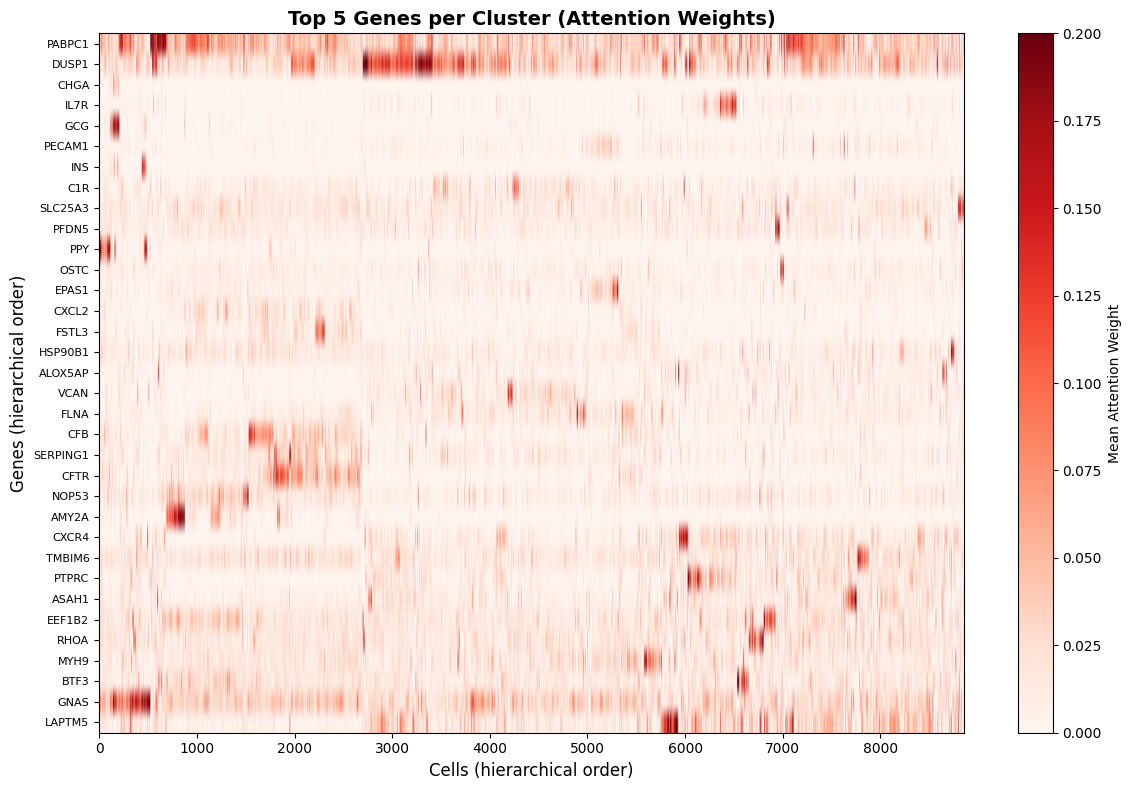

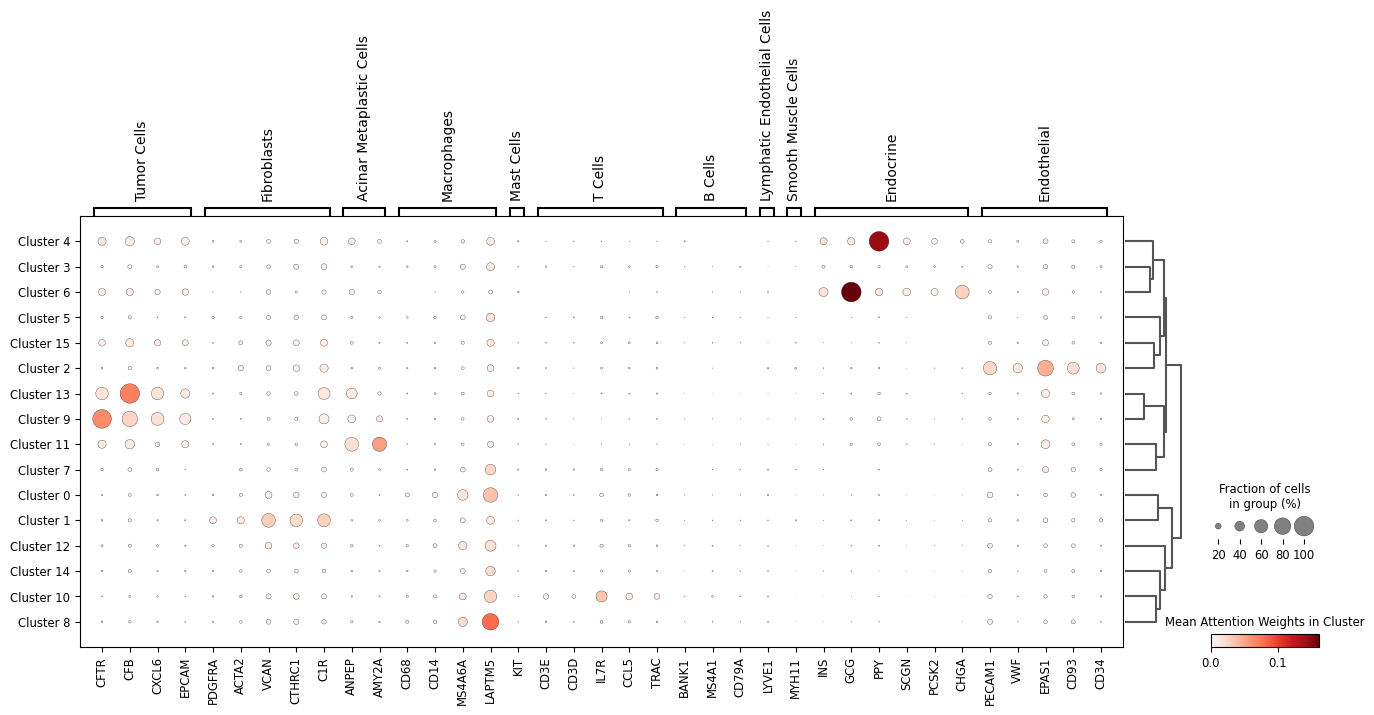

In [3]:
attention_matrices = attention_results['adj_matrix']
cell_ids = attention_results['cell_ids']
gene_names = attention_results['gene_names']
layer_index = 4

unnormalized_analyzer = GeneCellAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_cells=attention_matrices[0][0].shape[1], num_heads=4, num_layers=5)

# run the analysis
kwargs = {'attention_matrices': attention_matrices, 'cell_ids': cell_ids, 'cell_type_dict': cell_type_dict, 'gene_names': gene_names, 'layer_idx': layer_index, 'max_cells': None, 'min_attention_threshold': 1e-6, 'max_attention_threshold': 1, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'marker_genes_dict': marker_genes_dict, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_top_genes_cluster_heatmap': None, 'save_path_top_genes_cell_heatmap': None}

unnormalized_analyzer.run_complete_analysis(**kwargs)

In [4]:
# compute the similarity matrix between the normalized top gene dict and unnormalized top gene dict

def compute_gene_similarity(dict1, dict2):
    common_cells = set(dict1.keys()) & set(dict2.keys())
    if not common_cells:
        return 0.0
    
    similarities = []
    for cell in common_cells:
        genes1 = [gene for gene, score in dict1[cell]]
        genes2 = [gene for gene, score in dict2[cell]]
        set1 = set(genes1)
        set2 = set(genes2)
        intersection = len(set1 & set2)
        union = len(set1 | set2)
        sim = intersection / union if union > 0 else 0.0
        similarities.append(sim)
    
    return sum(similarities) / len(similarities)

# get the top genes per cluster
top_genes_dict = analyzer.get_top_genes_per_cluster(top_k=5, threshold=0.001, true_cell_type=True)

unnormalized_top_genes_dict = unnormalized_analyzer.get_top_genes_per_cluster(top_k=5, threshold=0.001, true_cell_type=True)

# compute the similarity matrix between the normalized top gene dict and unnormalized top gene dict
compute_gene_similarity(top_genes_dict, unnormalized_top_genes_dict)

Using true cell types to get top genes per true cell type...
Top genes identified for 14 clusters
Using true cell types to get top genes per true cell type...
Top genes identified for 14 clusters


0.9761904761904762

Creating top genes heatmap...


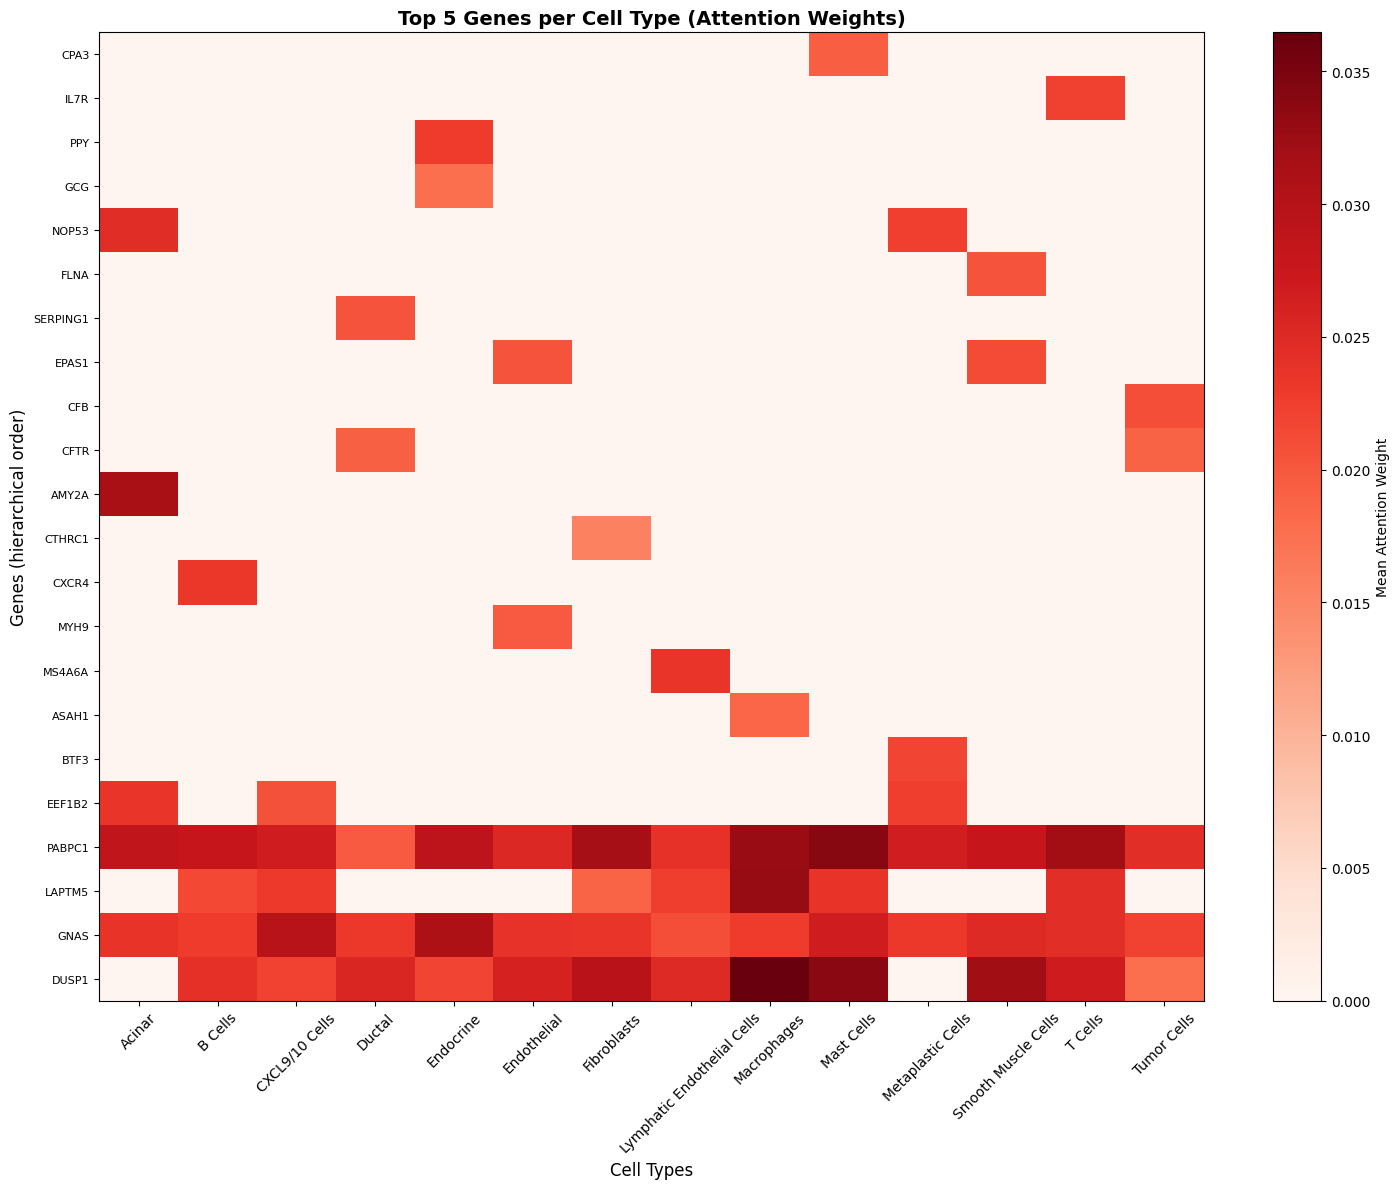

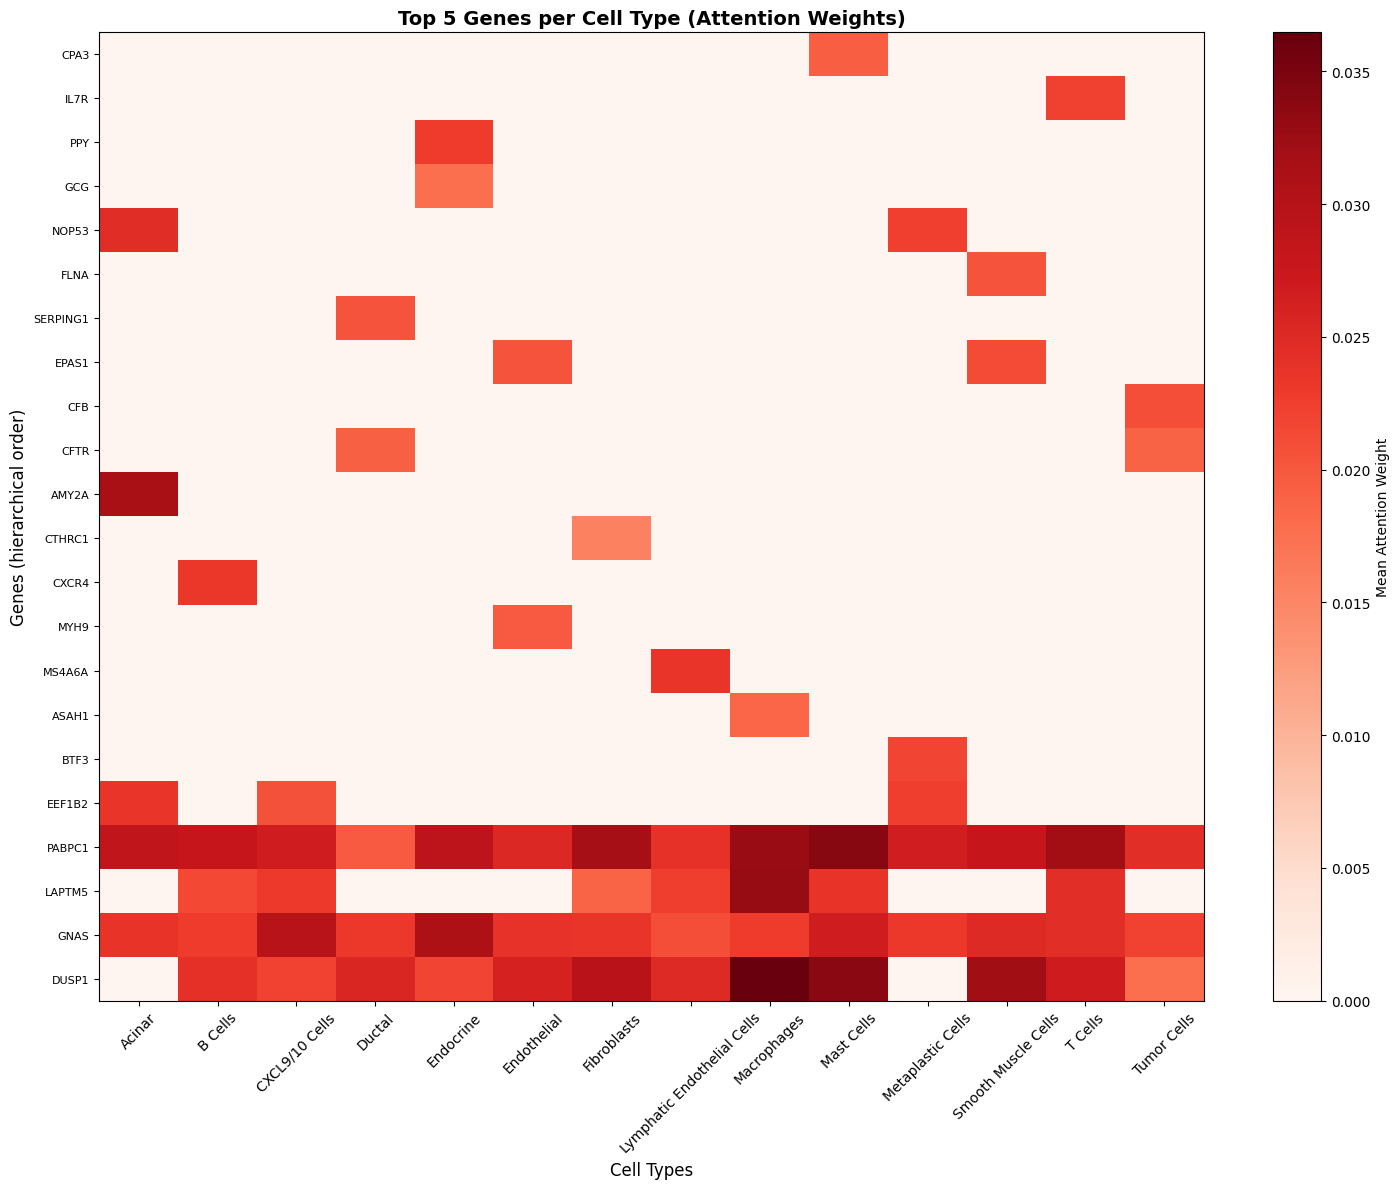

In [12]:
analyzer.visualize_top_genes_cluster_heatmap(top_genes_dict, top_k=5, save_path=None, figsize=(15, 12), vmin=None, vmax=None, true_cell_type=True)



Creating top genes heatmap...


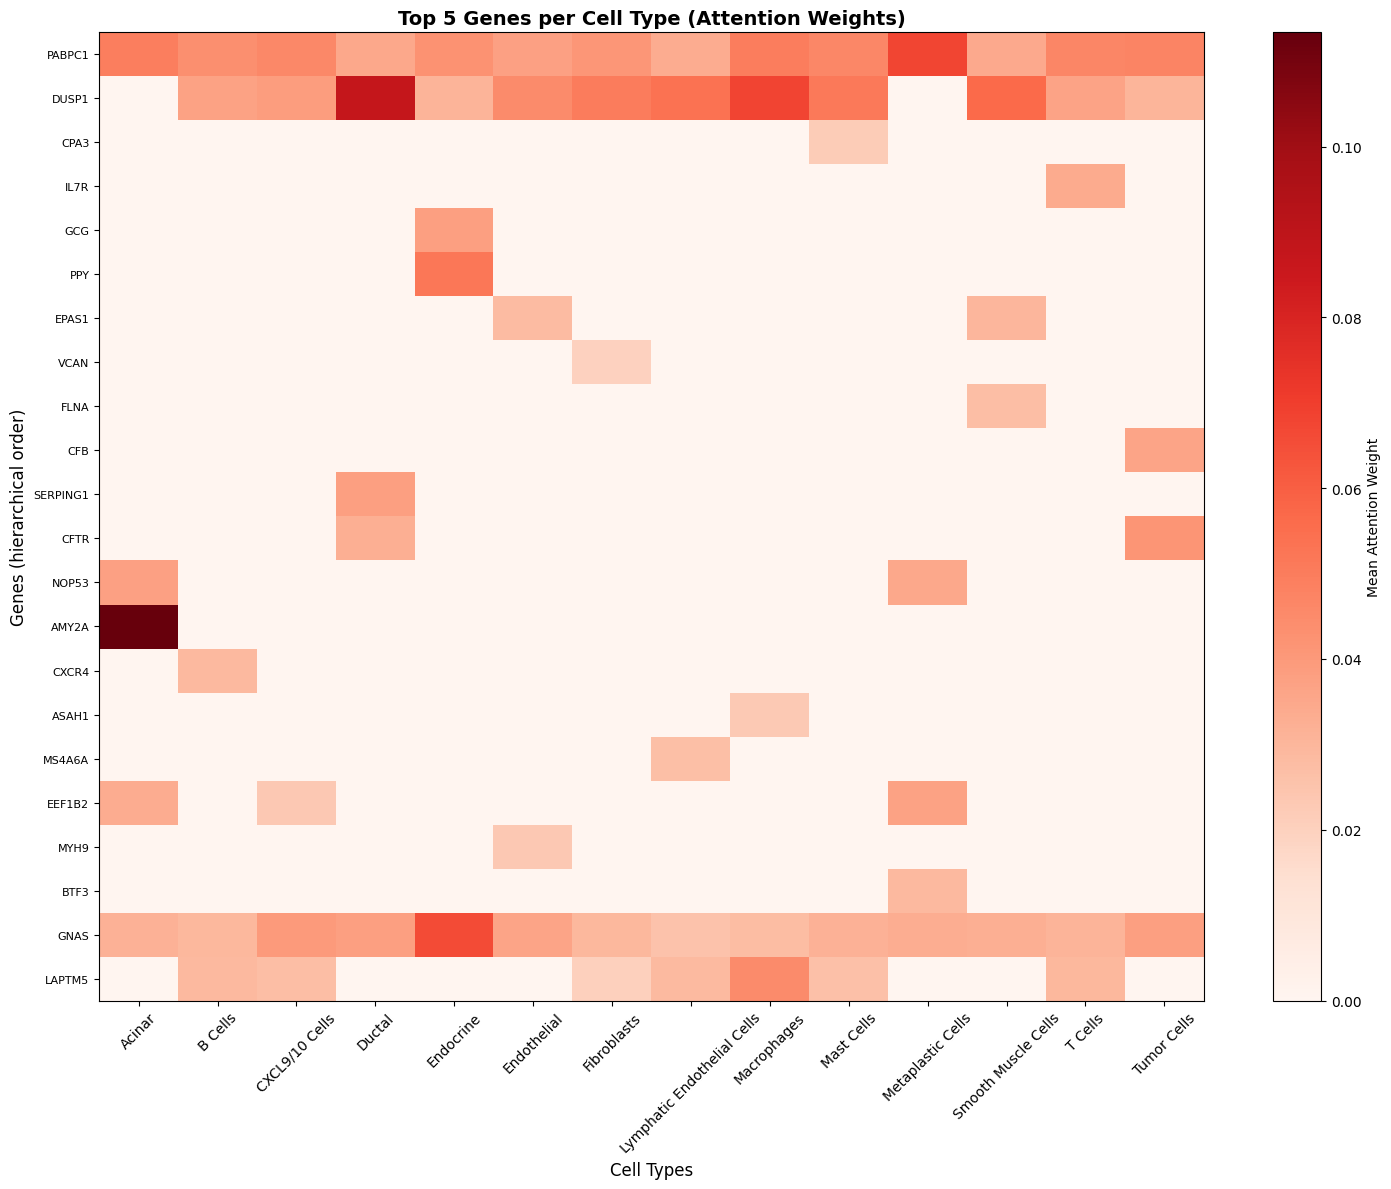

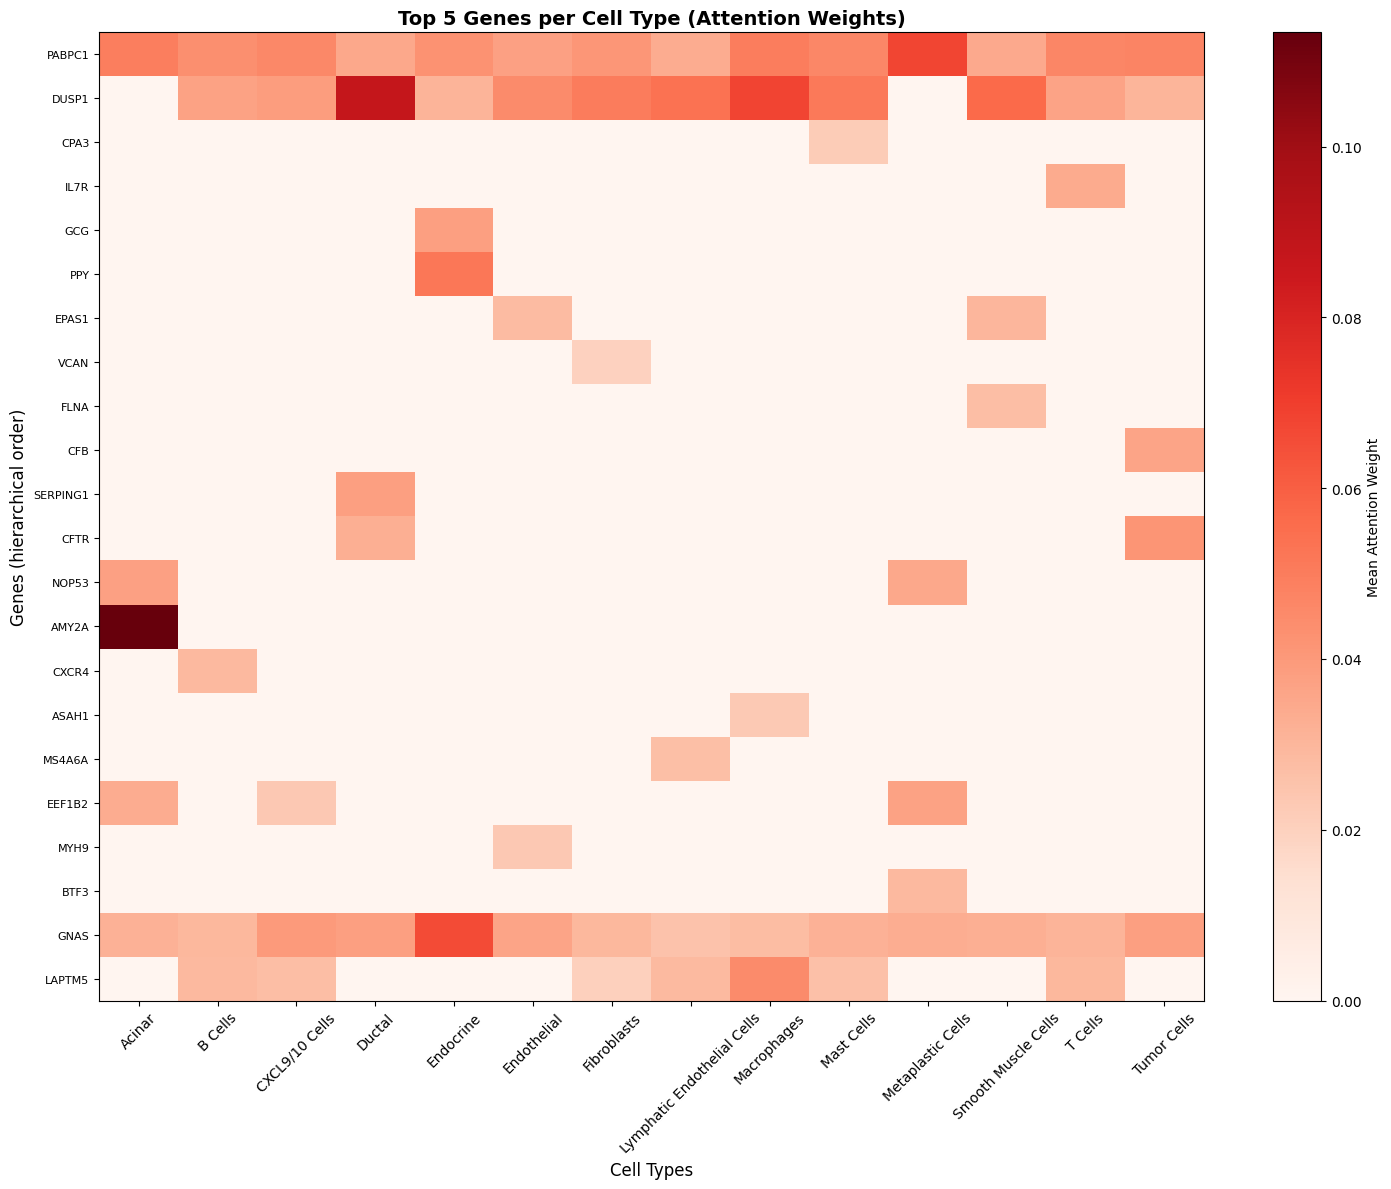

In [13]:
unnormalized_analyzer.visualize_top_genes_cluster_heatmap(unnormalized_top_genes_dict, top_k=5, save_path=None, figsize=(15, 12), vmin=None, vmax=None, true_cell_type=True)